In [27]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_results = []
june_results = session.query(Measurement.date,Measurement.tobs).filter(extract('month',Measurement.date)==6).all()

In [5]:
#  3. Convert the June temperatures to a list.
#june_temp = list(np.ravel(june_results))
june_temp = list(june_results)

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_temp, columns=['date','June Temps'])
june_df.set_index(june_df['date'], inplace=True)
june_df = june_df.sort_index()
print(june_df.to_string(index=False))
#june_df

      date  June Temps
2010-06-01        78.0
2010-06-01        73.0
2010-06-01        77.0
2010-06-01        69.0
2010-06-01        76.0
2010-06-01        71.0
2010-06-01        74.0
2010-06-01        70.0
2010-06-01        74.0
2010-06-02        78.0
2010-06-02        70.0
2010-06-02        76.0
2010-06-02        76.0
2010-06-02        71.0
2010-06-02        76.0
2010-06-02        76.0
2010-06-02        72.0
2010-06-02        76.0
2010-06-03        74.0
2010-06-03        78.0
2010-06-03        73.0
2010-06-03        72.0
2010-06-03        77.0
2010-06-03        76.0
2010-06-03        75.0
2010-06-03        78.0
2010-06-03        67.0
2010-06-04        73.0
2010-06-04        75.0
2010-06-04        75.0
2010-06-04        76.0
2010-06-04        73.0
2010-06-04        68.0
2010-06-04        72.0
2010-06-04        70.0
2010-06-04        74.0
2010-06-05        73.0
2010-06-05        77.0
2010-06-05        78.0
2010-06-05        76.0
2010-06-05        72.0
2010-06-05        79.0
2010-06-05 

In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [14]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december_results = []
december_results = session.query(Measurement.date,Measurement.tobs).filter(extract('month',Measurement.date)==12).all()

In [15]:
# 7. Convert the December temperatures to a list.
december_temp = list(december_results)

In [18]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_df = pd.DataFrame(december_temp, columns=['date','December Temps'])
december_df.set_index(december_df['date'], inplace=True)
december_df = december_df.sort_index()
print(december_df.to_string(index=False))

      date  December Temps
2010-12-01            76.0
2010-12-01            73.0
2010-12-01            72.0
2010-12-01            78.0
2010-12-01            72.0
2010-12-01            70.0
2010-12-01            71.0
2010-12-01            73.0
2010-12-02            71.0
2010-12-02            71.0
2010-12-02            73.0
2010-12-02            75.0
2010-12-02            74.0
2010-12-02            72.0
2010-12-02            74.0
2010-12-02            70.0
2010-12-03            67.0
2010-12-03            74.0
2010-12-03            70.0
2010-12-03            74.0
2010-12-03            71.0
2010-12-03            74.0
2010-12-03            72.0
2010-12-03            73.0
2010-12-04            75.0
2010-12-04            72.0
2010-12-04            77.0
2010-12-04            74.0
2010-12-04            74.0
2010-12-04            78.0
2010-12-04            74.0
2010-12-05            66.0
2010-12-05            69.0
2010-12-05            71.0
2010-12-05            78.0
2010-12-05            73.0
2

In [19]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [23]:
# Additional queries

#june temp_percip
june_perc_temp = []
june_perc_temp = session.query(Measurement.date,Measurement.tobs, Measurement.prcp).filter(extract('month',Measurement.date)==6).all()
june_p_t = list(june_perc_temp)
june_overall_df = pd.DataFrame(june_p_t, columns=['date','June Temps','Precipitation'])
june_overall_df.set_index(june_overall_df['date'], inplace=True)
june_overall_df = june_overall_df.sort_index()
#print(june_overall_df.to_string(index=False))
june_overall_df.describe()

,June Temps,Precipitation
count,1700.000000,1574.000000
mean,74.944118,0.136360
std,3.257417,0.335731
min,64.000000,0.000000
25%,73.000000,0.000000
50%,75.000000,0.020000
75%,77.000000,0.120000
max,85.000000,4.430000


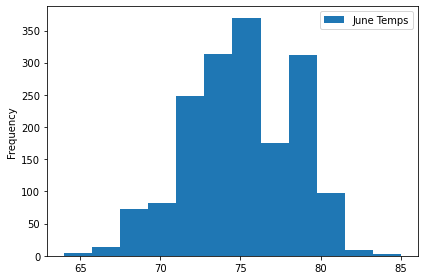

In [34]:
#june histogram
june_his = session.query(Measurement.date,Measurement.tobs).filter(extract('month',Measurement.date)==6).all()
june_h_l = list(june_his)
june_his_df = pd.DataFrame(june_h_l, columns=['date','June Temps'])
june_his_df.set_index(june_his_df['date'], inplace=True)
june_his_df = june_df.sort_index()
june_his_df.plot.hist(bins=12)
plt.tight_layout()
plt.show()

In [33]:
#december temp_percip
dec_perc_temp = []
dec_perc_temp = session.query(Measurement.date,Measurement.tobs, Measurement.prcp).filter(extract('month',Measurement.date)==12).all()
dec_p_t = list(dec_perc_temp)
dec_overall_df = pd.DataFrame(dec_p_t, columns=['date','December Temps','Precipitation'])
dec_overall_df.set_index(dec_overall_df['date'], inplace=True)
dec_overall_df = dec_overall_df.sort_index()
#print(june_overall_df.to_string(index=False))
dec_overall_df.describe()

,December Temps,Precipitation
count,1517.000000,1405.000000
mean,71.041529,0.216819
std,3.745920,0.541399
min,56.000000,0.000000
25%,69.000000,0.000000
50%,71.000000,0.030000
75%,74.000000,0.150000
max,83.000000,6.420000


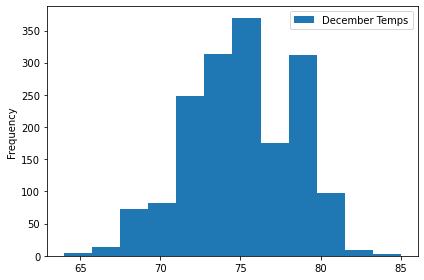

In [36]:
#december histogram
dec_his = session.query(Measurement.date,Measurement.tobs).filter(extract('month',Measurement.date)==12).all()
dec_h_l = list(june_his)
dec_his_df = pd.DataFrame(dec_h_l, columns=['date','December Temps'])
dec_his_df.set_index(dec_his_df['date'], inplace=True)
dec_his_df = dec_his_df.sort_index()
dec_his_df.plot.hist(bins=12)
plt.tight_layout()
plt.show()